<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Библиотеки</b></font>

In [1]:
# %pip install pandas
# %pip install Jinja2
# %pip install matplotlib
# %pip install seaborn
# %pip install requests
# %pip install folium

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import requests
import json
import folium
from folium.plugins import FastMarkerCluster
import webbrowser

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Чтение данных</b></font>

Для этой задачи у нас есть разные источники данных, каждый из которых описывает определенную тему, связанную с продажами в электронной коммерции. Файлы:

    olist_customers_dataset.csv
    olist_geolocation_dataset.csv
    olist_orders_dataset.csv
    olist_order_items_dataset.csv
    olist_order_payments_dataset.csv
    olist_order_reviews_dataset.csv
    olist_products_dataset.csv
    olist_sellers_dataset.csv
    product_category_name_translation.csv

Связь между этими файлами описана в документации. Итак, давайте прочитаем наборы данных и сделаем начальный анализ со всеми из них. Этот шаг очень поможет нам принять правильные решения в будущем исследовательском анализе данных.

In [3]:
common_path = '../data/'

customers = pd.read_csv(common_path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(common_path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(common_path + 'olist_order_items_dataset.csv')
order_payments = pd.read_csv(common_path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(common_path + 'olist_order_reviews_dataset.csv')
orders = pd.read_csv(common_path + 'olist_orders_dataset.csv')
products = pd.read_csv(common_path + 'olist_products_dataset.csv')
sellers = pd.read_csv(common_path + 'olist_sellers_dataset.csv')
category_name_translation = pd.read_csv(common_path + 'product_category_name_translation.csv')

<a id="2.1"></a>
<font color="dimgrey" size=+2.0><b>2.1 Обзор на данные</b></font>

In [4]:
datasets = [customers, geolocation, order_items, order_payments, order_reviews, orders, products, sellers]
dataset_names = ['customers', 'geolocation', 'order_items', 'order_payments', 'order_reviews', 'orders', 'products', 'sellers']

datasets_info = pd.DataFrame({})
datasets_info['dataset'] = dataset_names
datasets_info['n_rows'] = [df.shape[0] for df in datasets]
datasets_info['n_cols'] = [df.shape[1] for df in datasets]
datasets_info['n_null'] = [df.isnull().sum().sum() for df in datasets]
datasets_info['n_null_columns'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
datasets_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

datasets_info.style.background_gradient()

,dataset,n_rows,n_cols,n_null,n_null_columns,null_columns_names
0,customers,99441,5,0,0,
1,geolocation,1000163,5,0,0,
2,order_items,112650,7,0,0,
3,order_payments,103886,5,0,0,
4,order_reviews,99224,7,145903,2,"review_comment_title, review_comment_message"
5,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
6,products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,sellers,3095,4,0,0,


<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Разведка данных</b></font>

<a id="3.1"></a>
<font color="dimgrey" size=+2.0><b>3.1 Общее кол-во заказов на E-Commerce</b></font>

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\747936405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=orders_customers_df, stat='count', palette='bright')


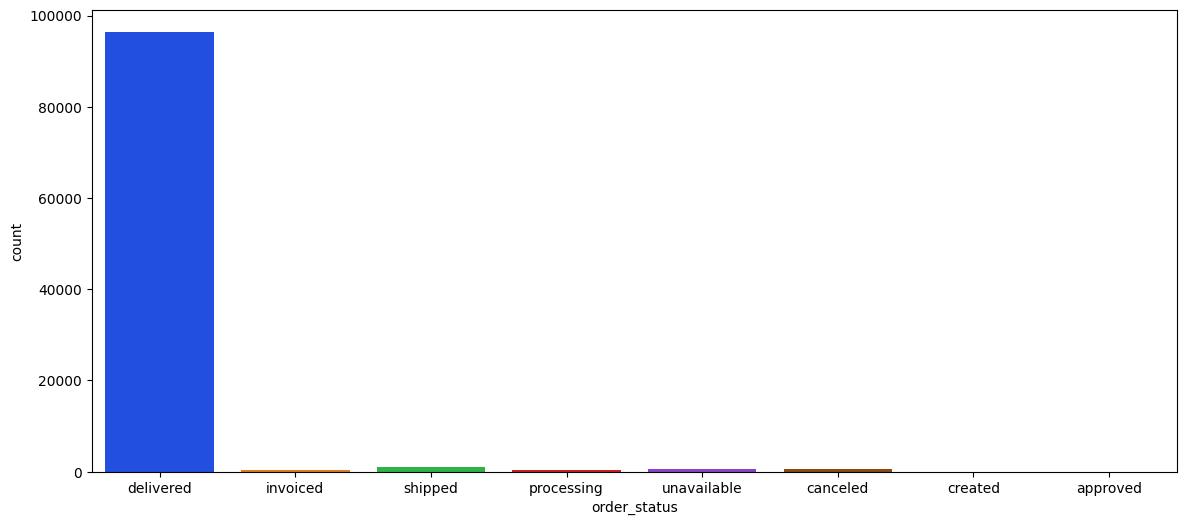

In [7]:
orders_customers_df = orders.merge(customers, how='left', on='customer_id')
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x='order_status', data=orders_customers_df, stat='count', palette='bright')

plt.show()


In [8]:
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [9]:
timestamp_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


for col_name in timestamp_columns:
    orders_customers_df[col_name] = pd.to_datetime(orders_customers_df[col_name])


orders_customers_df['order_purchase_year'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.year)
orders_customers_df['order_purchase_month'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.month)
orders_customers_df['order_purchase_month_name'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
orders_customers_df['order_purchase_year_month'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y/%m'))
orders_customers_df['order_purchase_date'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y/%m/%d'))

orders_customers_df['order_purchase_day'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.day)
orders_customers_df['order_purchase_dayofweek'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
orders_customers_df['order_purchase_dayofweek_name'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

orders_customers_df['order_purchase_hour'] = orders_customers_df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [0, 6, 12, 18, 24]
hour_labels = ['Рассвет', 'Утро', 'День', 'Ночь']
orders_customers_df['order_purchase_day_part'] = pd.cut(orders_customers_df['order_purchase_hour'], bins=hours_bins, labels=hour_labels)


orders_customers_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_day_part
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,2017/10,2017/10/02,2,0,Mon,10,Утро
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,2018/07,2018/07/24,24,1,Tue,20,Ночь
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,2018/08,2018/08/08,8,2,Wed,8,Утро
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017,11,Nov,2017/11,2017/11/18,18,5,Sat,19,Ночь
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018,2,Feb,2018/02,2018/02/13,13,1,Tue,21,Ночь


In [10]:
title_fontdict = {'fontsize' : 16, 'fontfamily' : 'sans-serif', 'color' : 'dimgrey'}
xy_label_fontdict = {'fontsize' : 12, 'fontfamily' : 'sans-serif'}

Вопросы:

1. Есть ли какая-либо тенденция роста в бразильской электронной коммерции?
2. В какой день недели бразильские клиенты склонны совершать покупки онлайн?
3. В какое время бразильские клиенты склонны совершать покупки (рассвет, утро, день или ночь)?

C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\3430542112.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2_label_dict[label] for label in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\3430542112.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


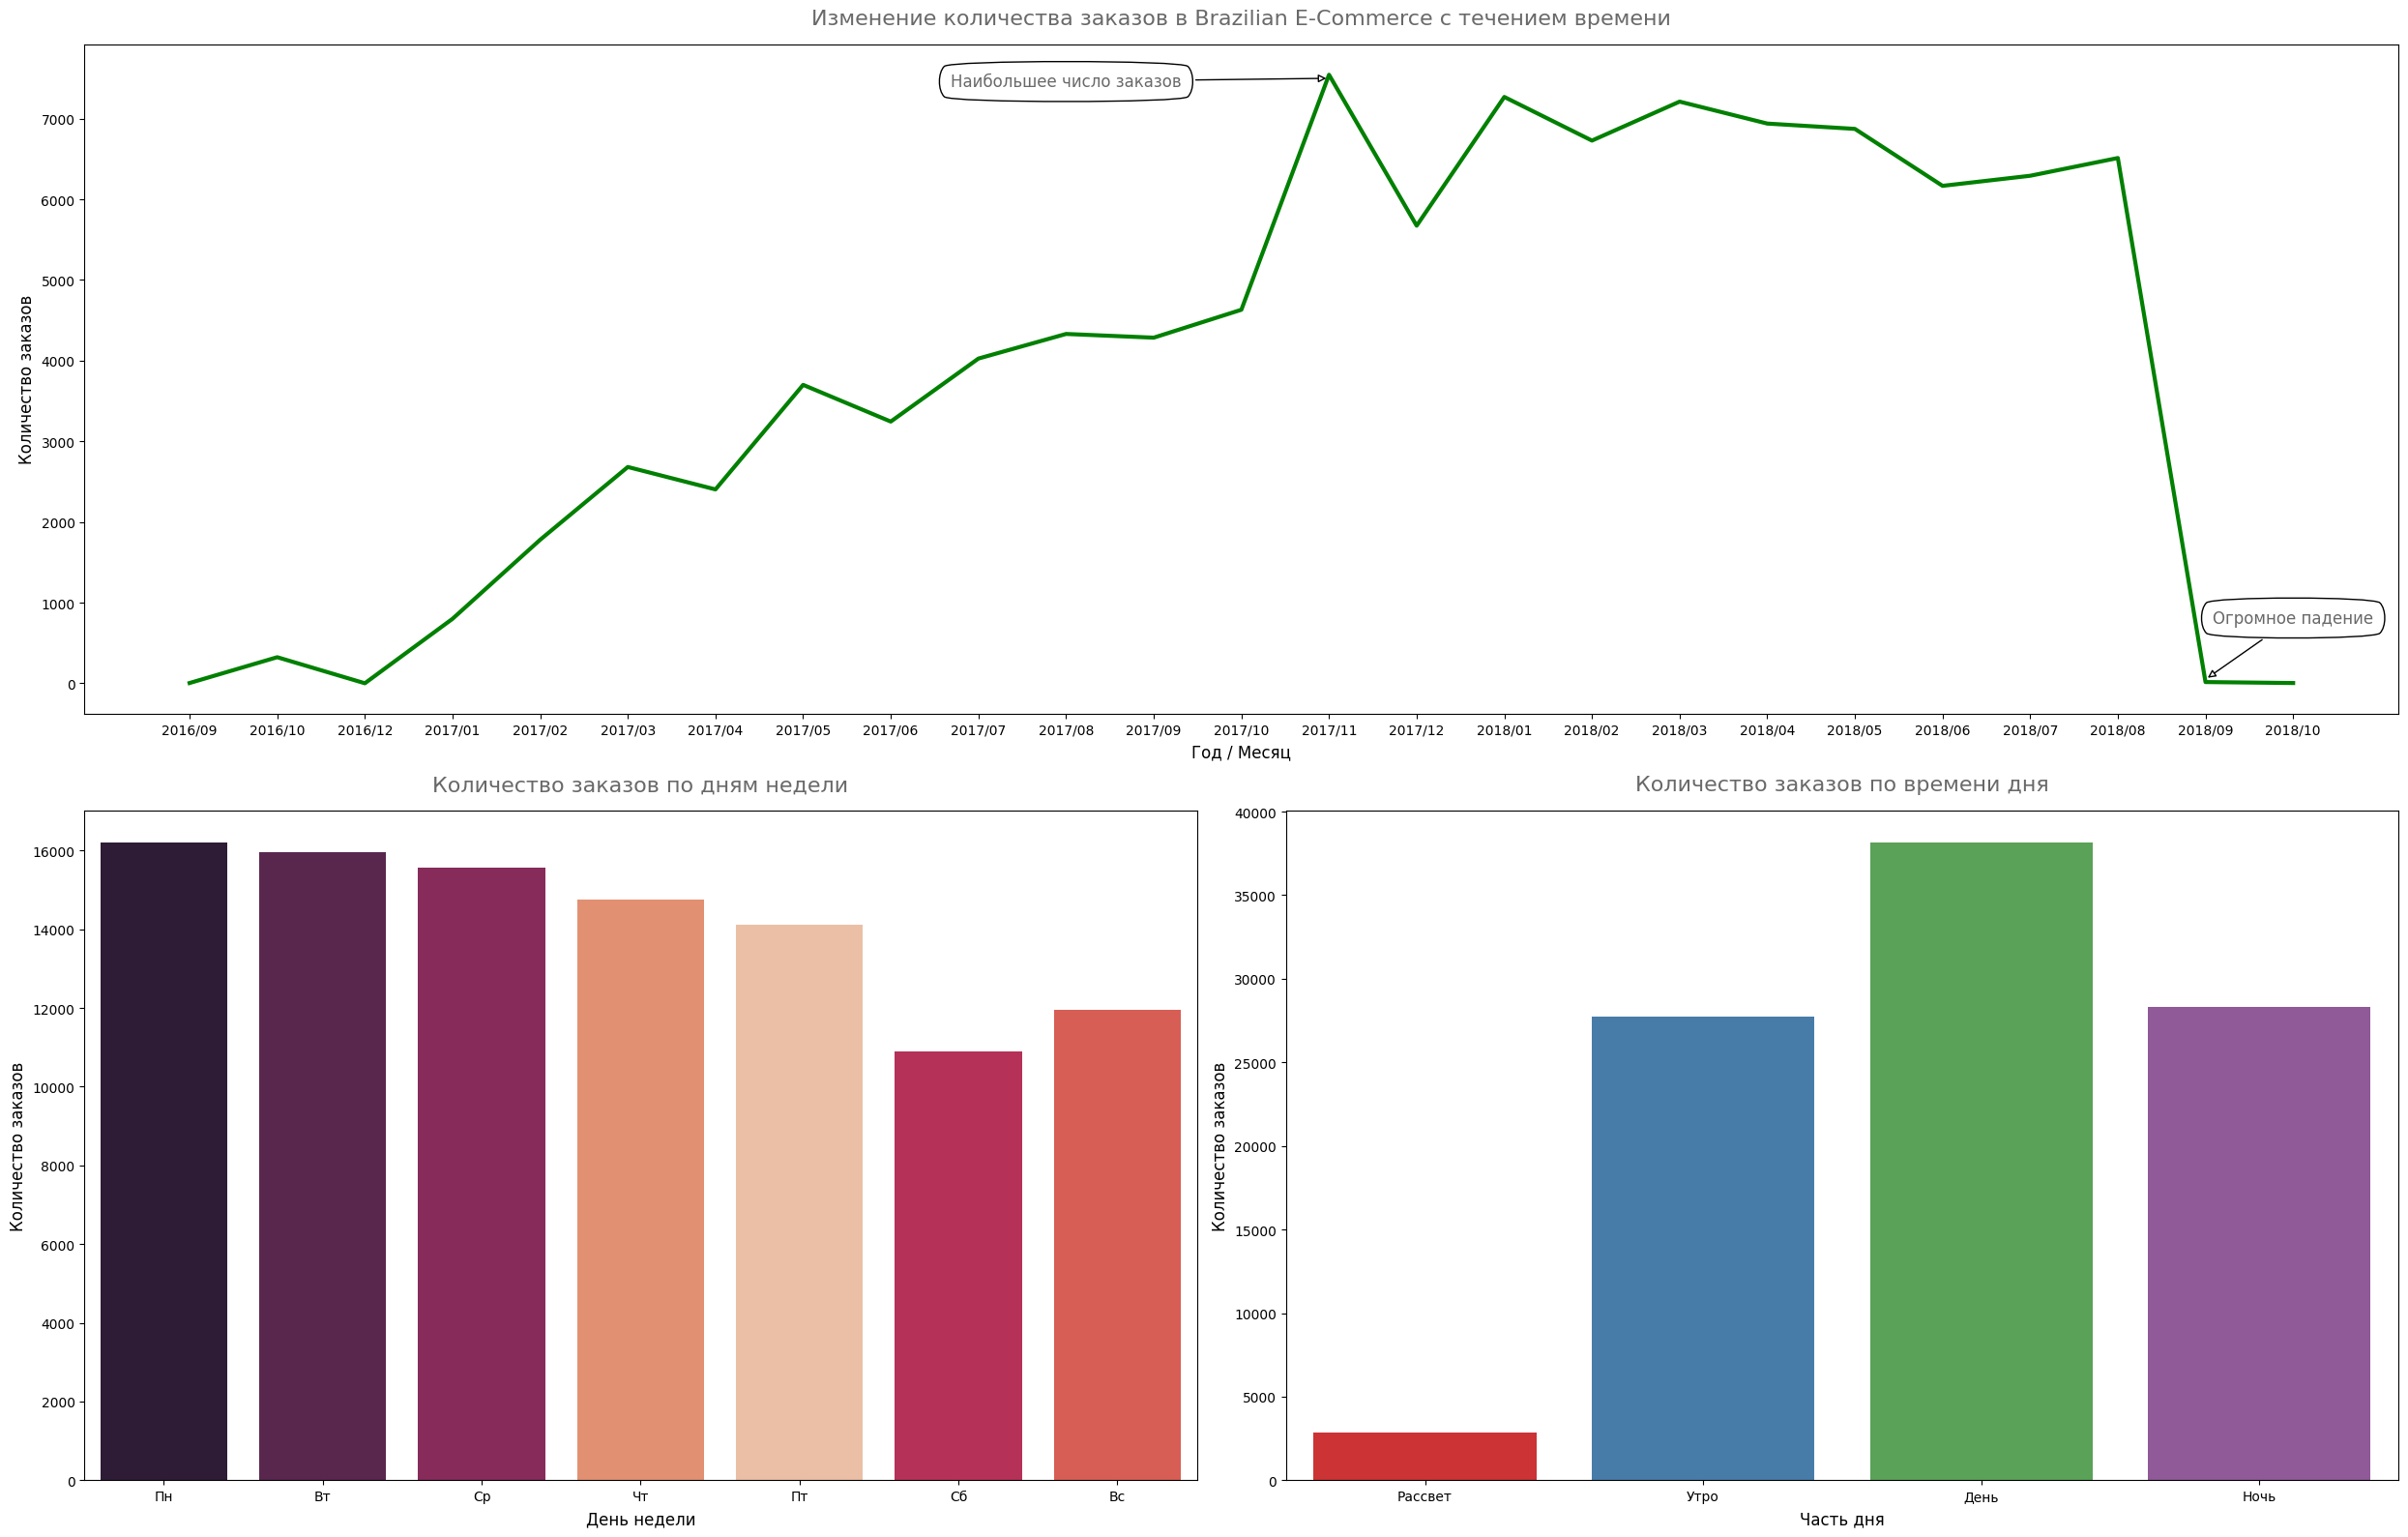

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(25, 16))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])



sns.lineplot(data=orders_customers_df['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, color='green', linewidth=3)
ax1.set_title('Изменение количества заказов в Brazilian E-Commerce с течением времени', fontdict=title_fontdict, pad=15)
ax1.annotate(text=f'Наибольшее число заказов', 
             xy=(13,7500), 
             xytext=(10, 7400), 
             color='dimgrey',
             ha='center',
             fontsize=12,
             arrowprops=dict(fc='white', arrowstyle='-|>'),  
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round4', pad=.8, fc='w'))

ax1.annotate(text=f'Огромное падение', 
             xy=(23,50), 
             xytext=(24, 750), 
             color='dimgrey',
             ha='center',
             fontsize=12,
             arrowprops=dict(fc='white', arrowstyle='-|>'),  
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round4', pad=.8, fc='w'))
ax1.set_xlabel('Год / Месяц', labelpad=5, fontdict=xy_label_fontdict)
ax1.set_ylabel('Количество заказов', labelpad=4, fontdict=xy_label_fontdict)


ax2.set_title('Количество заказов по дням недели', fontdict=title_fontdict, pad=15)
ax2_label_dict = {'Mon' : 'Пн',
                  'Tue' : 'Вт',
                  'Wed' : 'Ср',
                  'Thu' : 'Чт',
                  'Fri' : 'Пт',
                  'Sat' : 'Сб',
                  'Sun' : 'Вс'}

sns.countplot(x='order_purchase_dayofweek_name', data=orders_customers_df, stat='count', palette='rocket', ax=ax2, hue ='order_purchase_dayofweek_name', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
ax2.set_xticklabels(ax2_label_dict[label] for label in ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

ax2.set_xlabel('День недели', labelpad=5, fontdict=xy_label_fontdict)
ax2.set_ylabel('Количество заказов', labelpad=4, fontdict=xy_label_fontdict)


ax3.set_title('Количество заказов по времени дня', fontdict=title_fontdict, pad=15)


sns.countplot(x='order_purchase_day_part', data=orders_customers_df, stat='count', palette='Set1', ax=ax3, hue ='order_purchase_day_part', legend=False, order=hour_labels)


ax3.set_xlabel('Часть дня', labelpad=5, fontdict=xy_label_fontdict)
ax3.set_ylabel('Количество заказов', labelpad=4, fontdict=xy_label_fontdict)




plt.tight_layout()
plt.show()

C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\1928349253.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(month_name_dict[month_name] for month_name in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
c:\Users\roxasmeei\python_learning\projects\Brazilian E-Commerce\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


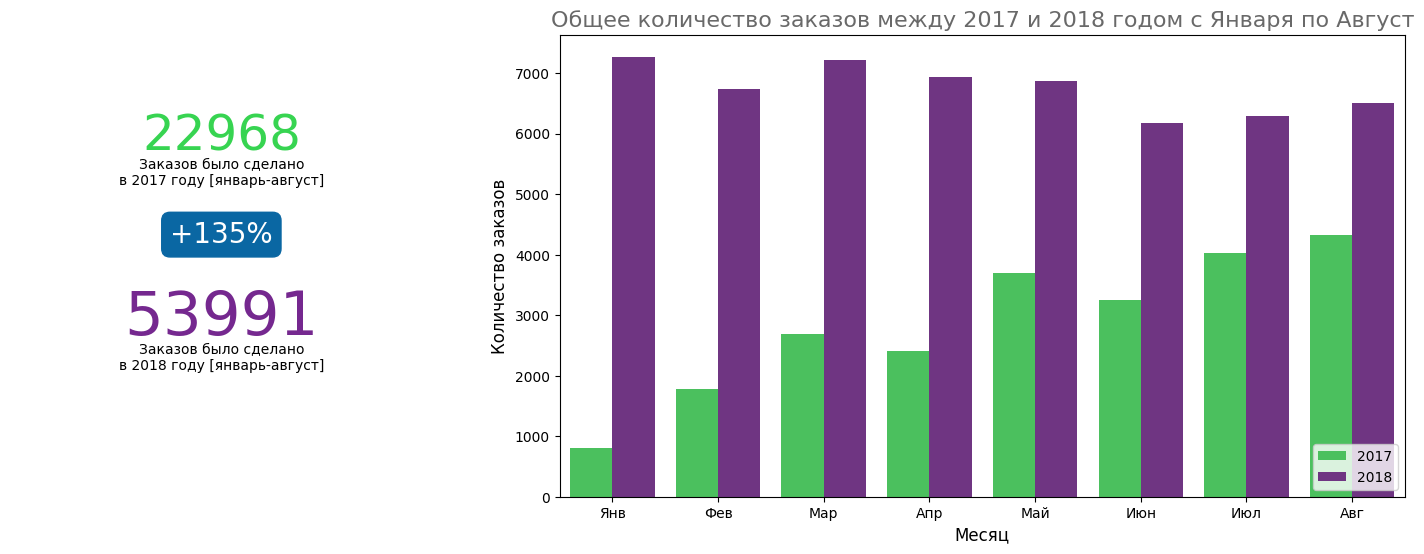

In [12]:
fig = plt.figure(constrained_layout=True, figsize=(18, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])


ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])


orders_compare = orders_customers_df[(orders_customers_df['order_purchase_year'].isin([2017, 2018])) & (orders_customers_df['order_purchase_month'] <= 8)]

month_name_dict = {'Jan':'Янв', 'Feb':'Фев', 'Mar':'Мар', 'Apr':'Апр', 'May':'Май', 'Jun':'Июн', 'Jul':'Июл', 'Aug':'Авг'}

sns.countplot(x='order_purchase_month_name', data=orders_compare, ax=ax2, hue='order_purchase_year', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'], palette=['#37d451','#75288f'])
ax2.set_xticklabels(month_name_dict[month_name] for month_name in ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
ax2.set_xlabel('Месяц', fontdict=xy_label_fontdict)
ax2.set_ylabel('Количество заказов', fontdict=xy_label_fontdict)
ax2.set_title('Общее количество заказов между 2017 и 2018 годом с Января по Август', fontdict=title_fontdict)




n_orders_year = orders_compare['order_purchase_year'].value_counts()

growth = n_orders_year[2018]/n_orders_year[2017] - 1
sign = '+' if growth > 0 else '-'

ax1.text(x=0.5, y=0.75, s=f'{n_orders_year[2017]}', ha='center', fontsize=36, color='#37d451')
ax1.text(x=0.5, y=0.675, s=f'Заказов было сделано\nв 2017 году [январь-август]', ha='center', fontsize=10, color='black')
ax1.text(x=0.5, y=0.35, s=f'{n_orders_year[2018]}', ha='center', fontsize=44, color='#75288f')
ax1.text(x=0.5, y=0.275, s=f'Заказов было сделано\nв 2018 году [январь-август]', ha='center', fontsize=10, color='black')
ax1.text(x=0.5, y=0.55, s=f'{sign}{int(round(growth, 2) * 100)}%', ha='center', fontsize=20, color='white',
         bbox={'boxstyle':'round', 'color':'#0A67A3'})



ax1.axis('off')

plt.legend(loc='lower right')
plt.show()

<a id="3.2"></a>
<font color="dimgrey" size=+2.0><b>3.2 E-Commerce в Бразилии</b></font>

Для подготовки данных к обходному анализу электронной коммерции в бразильских штатах мы выполним следующие шаги:

    1. Объединим данные заказов с данными order_items;
    2. Используем API (бразильское правительство) для возврата региона каждого customer_state;
    3. Создадим полезные диаграммы для ответа на вопросы бизнеса.

* Бразильская APIs для информации о геолокации:

        https://servicodados.ibge.gov.br/api/docs/localidades?versao=1

In [13]:
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_day_part
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,2017/10,2017/10/02,2,0,Mon,10,Утро
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,2018/07,2018/07/24,24,1,Tue,20,Ночь
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,2018/08,2018/08/08,8,2,Wed,8,Утро
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017,11,Nov,2017/11,2017/11/18,18,5,Sat,19,Ночь
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018,2,Feb,2018/02,2018/02/13,13,1,Tue,21,Ночь


In [14]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [15]:
df_orders_customers_items = orders_customers_df.merge(order_items, how='left', on='order_id')

r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)

br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop(['regiao'], axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

prepared_geolocation = geolocation[geolocation.geolocation_lat <= 5.269582] # The Northernmost point 5.269582 lat
prepared_geolocation = geolocation[geolocation.geolocation_lat >= -33.750936] # The Southernmost point -33.750936 lat
prepared_geolocation = geolocation[geolocation.geolocation_lng >= -73.98306] # The Westernmost point -73.98306 long
prepared_geolocation = geolocation[geolocation.geolocation_lng <= -28.847684] # The Easternmost -28.847684 long

prepared_geolocation_grouped = prepared_geolocation.groupby(by='geolocation_zip_code_prefix',  as_index=False).min()

df_orders_customers_items = df_orders_customers_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_customers_items = df_orders_customers_items.merge(prepared_geolocation_grouped, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

df_orders_customers_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,freight_value,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,8.72,35,SP,São Paulo,Sudeste,3149.0,-23.583885,-46.587473,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,22.76,29,BA,Bahia,Nordeste,47813.0,-12.945892,-45.016313,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,19.22,52,GO,Goiás,Centro-Oeste,75265.0,-16.752735,-48.522139,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,27.20,24,RN,Rio Grande do Norte,Nordeste,59296.0,-5.778488,-35.281450,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,8.72,35,SP,São Paulo,Sudeste,9195.0,-23.760018,-46.524784,santo andre,SP


___
* _Обзор на `orders_customers` по региону, штату и городу_
___

In [16]:
df_orders_customers_items_filt_bydate = df_orders_customers_items[df_orders_customers_items['order_purchase_timestamp'] >= '2017-01-01']
df_orders_customers_items_filt_bydate = df_orders_customers_items_filt_bydate[df_orders_customers_items['order_purchase_timestamp'] <= '2018-08-31']


df_regions_grouped = df_orders_customers_items_filt_bydate.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False).agg({'customer_id': 'count', 'price':'sum'}).sort_values(by='order_purchase_year_month')
df_sigla_grouped = df_orders_customers_items_filt_bydate.groupby(by=['sigla'], as_index=False).agg({'customer_id': 'count', 'price':'sum'}).sort_values(by='customer_id', ascending=False)
df_regions_grouped.columns = ['year_month', 'region', 'order_count', 'sum']
df_regions_grouped.reset_index(drop=True, inplace=True)


df_cities_grouped = df_orders_customers_items_filt_bydate.groupby(by=['geolocation_city'], as_index=False).count()[['geolocation_city', 'order_id']]
df_cities_grouped.rename({'order_id' : 'count'}, axis=1, inplace=True)
df_cities_grouped = df_cities_grouped.sort_values(by='count', ascending=False).reset_index(drop=True)
df_cities_grouped = df_cities_grouped.iloc[:10, :] # топ 10 городов по количеству заказов за период [2017/01/01- 2018/08/31]

C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\533959772.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_orders_customers_items_filt_bydate = df_orders_customers_items_filt_bydate[df_orders_customers_items['order_purchase_timestamp'] <= '2018-08-31']


C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\1865961011.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax2, x='count', y='geolocation_city', data=df_cities_grouped, palette='rocket')
C:\Users\roxasmeei\AppData\Local\Temp\ipykernel_2800\1865961011.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax3, x='customer_id', y='sigla', data=df_sigla_grouped, palette='rocket')


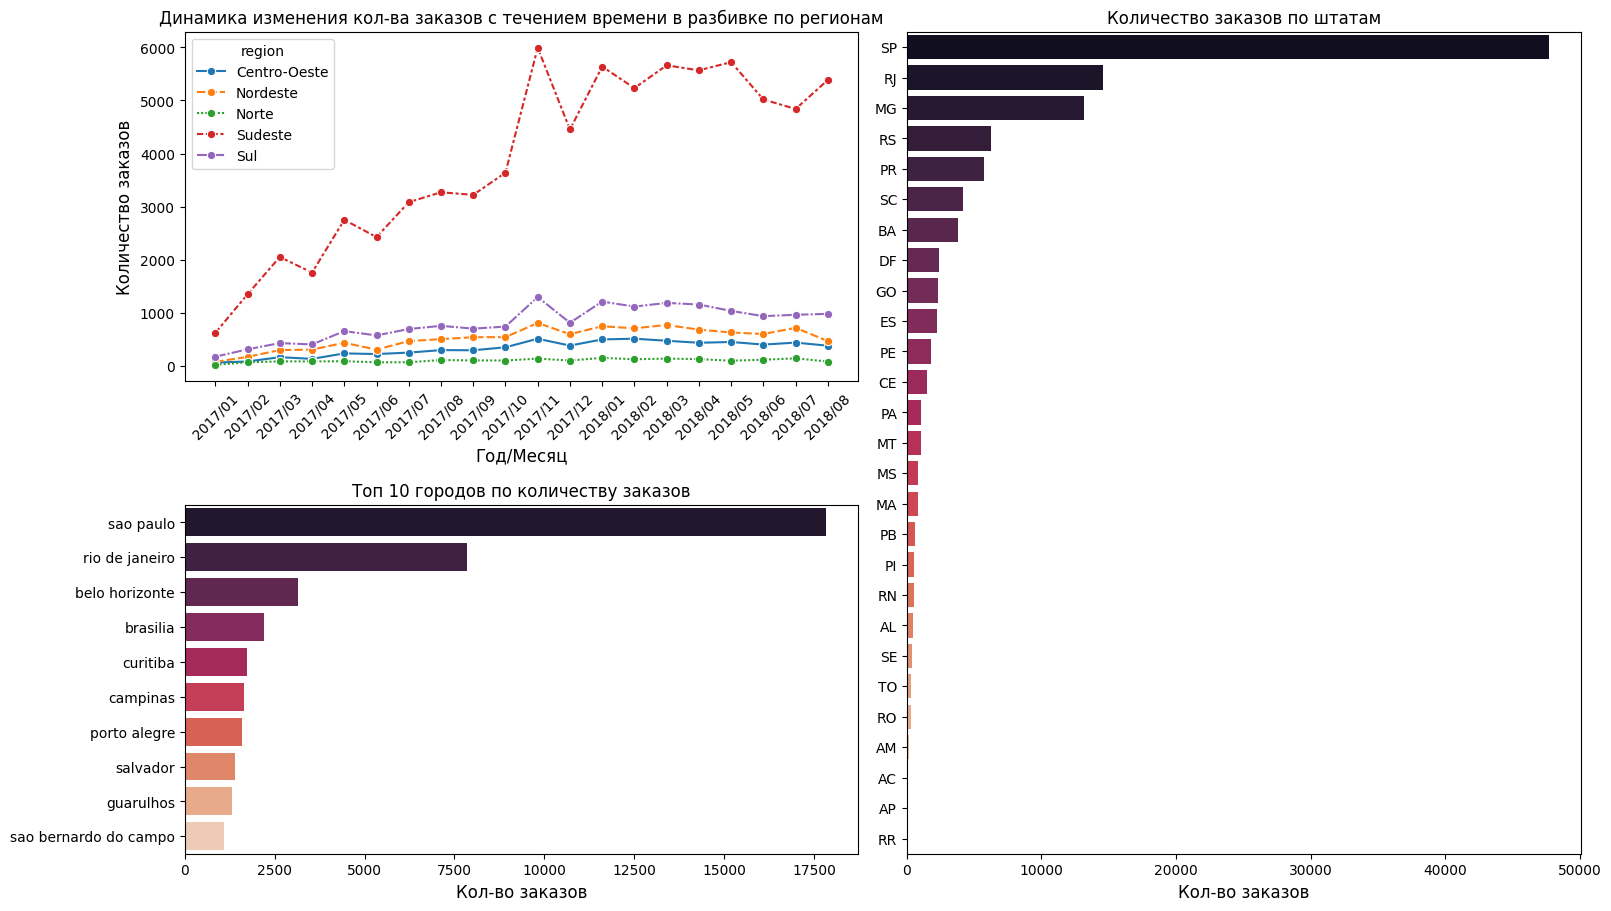

In [17]:
fig = plt.figure(figsize=(16, 9), constrained_layout=True)
gs = gridspec.GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])


sns.lineplot(ax=ax1, x='year_month', y='order_count', hue='region', data=df_regions_grouped, style='region', markers=['o'] * 5)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
    
ax1.set_xlabel('Год/Месяц',fontdict=xy_label_fontdict)
ax1.set_ylabel('Количество заказов',fontdict=xy_label_fontdict)
ax1.set_title('Динамика изменения кол-ва заказов с течением времени в разбивке по регионам')


sns.barplot(ax=ax2, x='count', y='geolocation_city', data=df_cities_grouped, palette='rocket')
ax2.set_xlabel('Кол-во заказов',fontdict=xy_label_fontdict)
ax2.set_ylabel('')
ax2.set_title('Топ 10 городов по количеству заказов')


sns.barplot(ax=ax3, x='customer_id', y='sigla', data=df_sigla_grouped, palette='rocket')
ax3.set_xlabel('Кол-во заказов',fontdict=xy_label_fontdict)
ax3.set_ylabel('')
ax3.set_title('Количество заказов по штатам')




plt.show()

___
* _Какое распределение клиентов по Бразилии? (Пример на 30.000 данных с 2018 года)_ 
___

In [19]:
map_lats = list(df_orders_customers_items[df_orders_customers_items['order_purchase_year'] == 2018]['geolocation_lat'].dropna().values)[:30000]
map_longs = list(df_orders_customers_items[df_orders_customers_items['order_purchase_year'] == 2018]['geolocation_lng'].dropna().values)[:30000]
coords = list(zip(map_lats, map_longs))

map1 = folium.Map(location=[-15, -50], zoom_start=4.0)

FastMarkerCluster(data=coords).add_to(map1)

map1.save("../output/user_destribution.html")
map1